## 데이터 파일 : InauguralAddress 폴더
- 1789~2017년 미국 대통령 취임 연설문 58개

## 연습문제 1
#### 1. 각 파일 텍스트로부터 알파벳 / 숫자 포함 어휘 추출하여 소문자 변환
#### 2. 각 파일에서 분포하는 'america' 와 'freedom' 의 상대빈도를 추출하여 데이터프레임 Address의 컬럼 America, Freedom 만들기
#### 3. 파일명에서 취임년도를 추출하여 데이터프레임 Address의 인덱스로 생성

In [20]:
import os, re
import pandas as pd
Years = []
America = []
Freedom = []
for i in os.listdir('./InauguralAddress'):
    n = [j.lower() 
         for j in open('./InauguralAddress/' + i,errors='ignore').read().split() 
         if re.search('\w',j)]
    Years.append(re.match('\d{4}',i).group())
    America.append(n.count('america')/len(n))
    Freedom.append(n.count('freedom')/len(n))
Address = pd.DataFrame({'America':America, 'Freedom':Freedom},
                      index = Years)

In [21]:
Address.shape

(58, 2)

## 기술 통계

In [22]:
Address.describe()

,America,Freedom
count,58.000000,58.000000
mean,0.001025,0.000965
std,0.001525,0.001240
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000553
75%,0.001845,0.001454
max,0.006181,0.005350


## 연습문제 2
- 데이터프레임 Address를 이용하여 다음의 boxplot을 만들고 분포적 특성을 해석해보시오.

<AxesSubplot:>

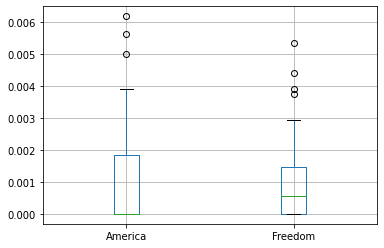

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
Address.boxplot()

- 1차적 목표 : 정규분포냐 아니냐, 정규분포가 아니다. 
- 중간값을 기준으로 1사분위와 3사분위 사이 간격이 다르고,최대값과 최소값의 간격도 다르다
- 이상치가 존재

## 연습문제 3
- 데이터프레임 Address를 이용하여 다음의 line-chart를 만들고 분포적 특성을 해석하시오.

Text(0, 0.5, '상대빈도')

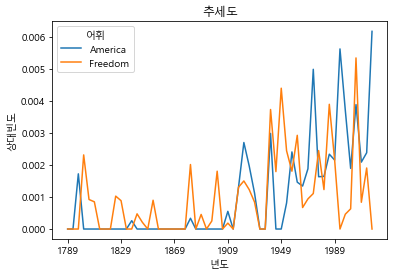

In [26]:
Address.columns.name = '어휘'
plt.rcParams['font.family'] = 'Malgun Gothic'
Address.plot()
plt.title('추세도')
plt.xlabel('년도')
plt.ylabel('상대빈도')

- 시대의 시대정신이자 미래의 비전을 제시하는 어휘들을 많이 사용되었을 것임.
- america와 freedom이 점차 많이 강조되고 있음
- america와 freedom이 미국 정치에서 상관성이 높을 가능성이 높다는 것을 알 수 있음

## 연습문제 4
- 데이터프레임 Address를 이용하여 다음의 scatter plot을 만들고, 단순선형 회귀선(simple linear regression line)을 삽입하시오.

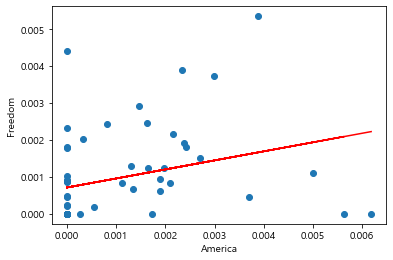

In [30]:
import numpy as np
a, b = np.polyfit(Address['America'],Address['Freedom'], 1)
plt.scatter(Address['America'],Address['Freedom'])
plt.xlabel('America')
plt.ylabel('Freedom')
plt.plot(Address['America'], a * Address['America'] + b, '-r')

- 1차 방정식 단순 선형 회귀
- 상관성을 따져볼 경우 회귀선 근처에 점들이 나타나지 않기에 정규분포 x
- 선형성 x

## 상관분석

In [ ]:
# 정규분포, 선형성 : pearson
# 비정규분포, 비선형 : kendall, spearman

# 상관계수는 -1 ~ 1사이의 값 0에 근접하면 상관성이 낮고 1또는 -1에 근접하면 높음
Address.corr(method='pearson')

In [33]:
Address.corr(method='kendall')

어휘,America,Freedom
어휘,,
America,1.000000,0.366278
Freedom,0.366278,1.000000


In [34]:
Address.corr(method='spearman')

어휘,America,Freedom
어휘,,
America,1.000000,0.462073
Freedom,0.462073,1.000000


- 양수일 경우에는 두 경우는 positive 하다. 하나가 증가하면 나머지도 증가한다.
- 음의 상관성은 하나의 변수가 증가하면 다른 변수의 값이 감소한다. 반비례

## 상관계수
 - small 0.1 , medium 0.3 , large 0.5
 - 위의 경우는 spearman이 가장 낫다.

## cumsum

<AxesSubplot:>

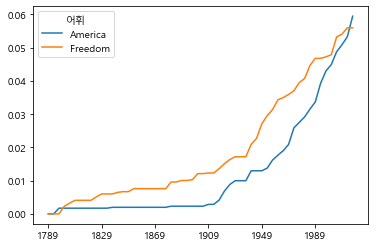

In [35]:
Address.cumsum().plot()

- 추세 라인 차트를 만들어 볼 수 있음 누적합계니깐 상승은 당연하지만
- 1900년도에서 본격적으로 사용되기 시작함.
- 1950년까지 1차 기울기 1950년부터 2차 기울기 2차 대전 종료 이후 예상 가능
- freedom이 더 많이 사용되었지만 근래에는 america가 더 많이 사용되고있음
- 비정규 분포지만 양의 상관성을 알 수 있었는데, cumsum을 통해서도 알 수 있음

## pct_change

<AxesSubplot:>

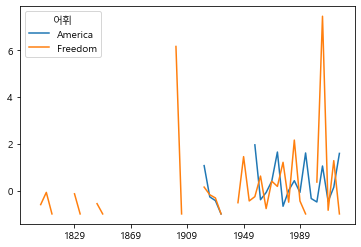

In [36]:
Address.pct_change().plot()

- 세계2차대전 종전 이후의 증가를 확인가능
- 어떤 해에는 아주 많이 언급됨

## 연습문제 5
- 데이터프레임 Address를 AmericaFreedom.txt 파일로 저장하시오.

In [38]:
Address.to_csv('AmericaFreedom.txt',sep = '\t')